In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from torch.optim import Adam
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn 
import seaborn as sns


In [ ]:

train = './images/train'
val = './images/validation'

image_size = (48, 48)
batch_size = 64

train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),   
    transforms.Resize(image_size),
    transforms.RandomHorizontalFlip(),             
    transforms.RandomAffine(
        degrees=10,                
        translate=(0.1, 0.1),    
    ),             
    transforms.ToTensor(),                         
    transforms.Normalize(mean=[0.5], std=[0.5]),                        
])

val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), 
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_data = datasets.ImageFolder(root=train, transform=train_transform)
validation_data = datasets.ImageFolder(root=val, transform=val_transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=16, persistent_workers=True)
val_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=16, persistent_workers=True)

In [ ]:

class EmotionRecognitionModel(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionRecognitionModel, self).__init__()

        # 1st Convolutional Block 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.36)

        # 2nd Convolutional Block
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.36)

        # 3rd Convolutional Block
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.36)

        # 4th Convolutional Block
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout4 = nn.Dropout(0.36)

        # Flattening
        self.fc_input_size = 256 * 3 * 3

        # Fully connected layer 1st layer
        self.fc1 = nn.Linear(self.fc_input_size, 256)
        self.bn5 = nn.BatchNorm1d(256)
        self.relu5 = nn.ReLU()
        self.dropout5 = nn.Dropout(0.36)

        # Fully connected layer 2nd layer
        self.fc2 = nn.Linear(256, 512)
        self.bn6 = nn.BatchNorm1d(512)
        self.relu6 = nn.ReLU()
        self.dropout6 = nn.Dropout(0.36)

        # Output layer
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Apply convolutional blocks
        x = self.dropout1(self.pool1(self.relu1(self.bn1(self.conv1(x)))))
        x = self.dropout2(self.pool2(self.relu2(self.bn2(self.conv2(x)))))
        x = self.dropout3(self.pool3(self.relu3(self.bn3(self.conv3(x)))))
        x = self.dropout4(self.pool4(self.relu4(self.bn4(self.conv4(x)))))

        # Flatten
        x = x.view(x.size(0), -1)

        # Apply fully connected layers
        x = self.dropout5(self.relu5(self.bn5(self.fc1(x))))
        x = self.dropout6(self.relu6(self.bn6(self.fc2(x))))

        # Output layer
        x = self.fc3(x)

        return x

model = EmotionRecognitionModel(num_classes=7)


In [ ]:

criterion = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters(), lr=0.0001)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50) 

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Running on {device}")
model.to(device)

Loading checkpoint from best_emotion_recognition_model.pth
Resuming from epoch 563


Epoch 564/1000: 100%|██████████| 458/458 [00:08<00:00, 52.72batch/s, accuracy=70.2, loss=0.794]

Epoch 564 | Train Loss: 0.7757 | Train Accuracy: 70.22%


Validation Loss: 0.9159 | Validation Accuracy: 67.66%


Epoch 565/1000: 100%|██████████| 458/458 [00:05<00:00, 81.98batch/s, accuracy=70.5, loss=1.65] 


Epoch 565 | Train Loss: 0.7799 | Train Accuracy: 70.47%
Validation Loss: 0.9164 | Validation Accuracy: 67.73%


Epoch 566/1000: 100%|██████████| 458/458 [00:05<00:00, 79.72batch/s, accuracy=70.3, loss=1.08] 


Epoch 566 | Train Loss: 0.7749 | Train Accuracy: 70.31%
Validation Loss: 0.9153 | Validation Accuracy: 67.51%


Epoch 567/1000: 100%|██████████| 458/458 [00:06<00:00, 74.14batch/s, accuracy=70, loss=0.527]  


Epoch 567 | Train Loss: 0.7830 | Train Accuracy: 70.04%
Validation Loss: 0.9157 | Validation Accuracy: 67.51%


Epoch 568/1000: 100%|██████████| 458/458 [00:06<00:00, 74.50batch/s, accuracy=70.3, loss=0.948]


Epoch 568 | Train Loss: 0.7768 | Train Accuracy: 70.32%
Validation Loss: 0.9061 | Validation Accuracy: 67.73%


Epoch 569/1000: 100%|██████████| 458/458 [00:05<00:00, 79.49batch/s, accuracy=69.8, loss=1.09] 


Epoch 569 | Train Loss: 0.7866 | Train Accuracy: 69.81%
Validation Loss: 0.9174 | Validation Accuracy: 67.58%


Epoch 570/1000: 100%|██████████| 458/458 [00:05<00:00, 83.55batch/s, accuracy=70.1, loss=0.77] 


Epoch 570 | Train Loss: 0.7815 | Train Accuracy: 70.11%
Validation Loss: 0.9118 | Validation Accuracy: 67.62%


Epoch 571/1000: 100%|██████████| 458/458 [00:05<00:00, 80.95batch/s, accuracy=70.1, loss=2.1]  


Epoch 571 | Train Loss: 0.7841 | Train Accuracy: 70.12%
Validation Loss: 0.9127 | Validation Accuracy: 67.68%


Epoch 572/1000: 100%|██████████| 458/458 [00:05<00:00, 79.91batch/s, accuracy=70.5, loss=0.966]


Epoch 572 | Train Loss: 0.7756 | Train Accuracy: 70.49%
Validation Loss: 0.9142 | Validation Accuracy: 67.56%


Epoch 573/1000: 100%|██████████| 458/458 [00:05<00:00, 79.33batch/s, accuracy=70.4, loss=1.1]  


Epoch 573 | Train Loss: 0.7771 | Train Accuracy: 70.35%
Validation Loss: 0.9224 | Validation Accuracy: 67.69%


Epoch 574/1000: 100%|██████████| 458/458 [00:06<00:00, 74.11batch/s, accuracy=70.2, loss=0.391]


Epoch 574 | Train Loss: 0.7812 | Train Accuracy: 70.21%
Validation Loss: 0.9073 | Validation Accuracy: 67.59%


Epoch 575/1000: 100%|██████████| 458/458 [00:05<00:00, 80.94batch/s, accuracy=70.1, loss=1.03] 


Epoch 575 | Train Loss: 0.7844 | Train Accuracy: 70.09%
Validation Loss: 0.9064 | Validation Accuracy: 67.83%


Epoch 576/1000: 100%|██████████| 458/458 [00:05<00:00, 80.89batch/s, accuracy=70.6, loss=0.65] 


Epoch 576 | Train Loss: 0.7752 | Train Accuracy: 70.64%
Validation Loss: 0.9031 | Validation Accuracy: 68.11%


Epoch 577/1000: 100%|██████████| 458/458 [00:05<00:00, 76.84batch/s, accuracy=70.4, loss=0.226]


Epoch 577 | Train Loss: 0.7755 | Train Accuracy: 70.36%
Validation Loss: 0.9079 | Validation Accuracy: 67.83%


Epoch 578/1000: 100%|██████████| 458/458 [00:05<00:00, 80.40batch/s, accuracy=70.5, loss=0.891]


Epoch 578 | Train Loss: 0.7784 | Train Accuracy: 70.46%
Validation Loss: 0.9132 | Validation Accuracy: 67.73%


Epoch 579/1000: 100%|██████████| 458/458 [00:05<00:00, 84.57batch/s, accuracy=70.5, loss=1.51]  


Epoch 579 | Train Loss: 0.7776 | Train Accuracy: 70.47%
Validation Loss: 0.9235 | Validation Accuracy: 67.15%


Epoch 580/1000: 100%|██████████| 458/458 [00:05<00:00, 78.10batch/s, accuracy=70.8, loss=0.94] 


Epoch 580 | Train Loss: 0.7747 | Train Accuracy: 70.77%
Validation Loss: 0.9112 | Validation Accuracy: 67.55%


Epoch 581/1000: 100%|██████████| 458/458 [00:05<00:00, 81.20batch/s, accuracy=70.6, loss=2.21] 


Epoch 581 | Train Loss: 0.7811 | Train Accuracy: 70.56%
Validation Loss: 0.9261 | Validation Accuracy: 67.32%


Epoch 582/1000: 100%|██████████| 458/458 [00:05<00:00, 77.11batch/s, accuracy=70.5, loss=0.983]


Epoch 582 | Train Loss: 0.7760 | Train Accuracy: 70.54%
Validation Loss: 0.9264 | Validation Accuracy: 67.49%


Epoch 583/1000: 100%|██████████| 458/458 [00:05<00:00, 81.85batch/s, accuracy=70.3, loss=0.971]


Epoch 583 | Train Loss: 0.7799 | Train Accuracy: 70.31%
Validation Loss: 0.9221 | Validation Accuracy: 67.53%


Epoch 584/1000: 100%|██████████| 458/458 [00:05<00:00, 84.58batch/s, accuracy=70.2, loss=1.11]  


Epoch 584 | Train Loss: 0.7812 | Train Accuracy: 70.15%
Validation Loss: 0.9153 | Validation Accuracy: 67.59%


Epoch 585/1000: 100%|██████████| 458/458 [00:05<00:00, 78.65batch/s, accuracy=70.4, loss=0.935]


Epoch 585 | Train Loss: 0.7832 | Train Accuracy: 70.36%
Validation Loss: 0.9066 | Validation Accuracy: 67.82%


Epoch 586/1000: 100%|██████████| 458/458 [00:05<00:00, 76.37batch/s, accuracy=70.6, loss=1.42] 


Epoch 586 | Train Loss: 0.7784 | Train Accuracy: 70.60%
Validation Loss: 0.9120 | Validation Accuracy: 67.62%


Epoch 587/1000: 100%|██████████| 458/458 [00:05<00:00, 82.40batch/s, accuracy=70.8, loss=0.902] 


Epoch 587 | Train Loss: 0.7767 | Train Accuracy: 70.77%
Validation Loss: 0.9089 | Validation Accuracy: 68.02%


Epoch 588/1000: 100%|██████████| 458/458 [00:06<00:00, 73.00batch/s, accuracy=70.2, loss=1.63] 


Epoch 588 | Train Loss: 0.7814 | Train Accuracy: 70.25%
Validation Loss: 0.9088 | Validation Accuracy: 67.46%


Epoch 589/1000: 100%|██████████| 458/458 [00:05<00:00, 80.28batch/s, accuracy=70.7, loss=1.35] 


Epoch 589 | Train Loss: 0.7741 | Train Accuracy: 70.75%
Validation Loss: 0.9095 | Validation Accuracy: 67.63%


Epoch 590/1000: 100%|██████████| 458/458 [00:06<00:00, 73.97batch/s, accuracy=70.5, loss=0.693]


Epoch 590 | Train Loss: 0.7782 | Train Accuracy: 70.55%
Validation Loss: 0.9149 | Validation Accuracy: 67.45%


Epoch 591/1000: 100%|██████████| 458/458 [00:06<00:00, 71.57batch/s, accuracy=70.6, loss=1.26] 


Epoch 591 | Train Loss: 0.7727 | Train Accuracy: 70.59%
Validation Loss: 0.9115 | Validation Accuracy: 67.68%


Epoch 592/1000: 100%|██████████| 458/458 [00:06<00:00, 76.00batch/s, accuracy=70.1, loss=0.654]


Epoch 592 | Train Loss: 0.7823 | Train Accuracy: 70.11%
Validation Loss: 0.9117 | Validation Accuracy: 67.96%


Epoch 593/1000: 100%|██████████| 458/458 [00:06<00:00, 73.38batch/s, accuracy=70.5, loss=2.36] 


Epoch 593 | Train Loss: 0.7745 | Train Accuracy: 70.46%
Validation Loss: 0.9307 | Validation Accuracy: 67.24%


Epoch 594/1000: 100%|██████████| 458/458 [00:06<00:00, 71.99batch/s, accuracy=70.6, loss=1.63] 


Epoch 594 | Train Loss: 0.7757 | Train Accuracy: 70.63%
Validation Loss: 0.9227 | Validation Accuracy: 67.25%


Epoch 595/1000: 100%|██████████| 458/458 [00:06<00:00, 74.76batch/s, accuracy=70.7, loss=0.791]


Epoch 595 | Train Loss: 0.7776 | Train Accuracy: 70.72%
Validation Loss: 0.9239 | Validation Accuracy: 66.87%


Epoch 596/1000: 100%|██████████| 458/458 [00:06<00:00, 74.21batch/s, accuracy=70.5, loss=0.571]


Epoch 596 | Train Loss: 0.7730 | Train Accuracy: 70.53%
Validation Loss: 0.9094 | Validation Accuracy: 67.69%


Epoch 597/1000: 100%|██████████| 458/458 [00:06<00:00, 71.39batch/s, accuracy=70.3, loss=0.914]


Epoch 597 | Train Loss: 0.7821 | Train Accuracy: 70.30%
Validation Loss: 0.9148 | Validation Accuracy: 67.80%


Epoch 598/1000: 100%|██████████| 458/458 [00:06<00:00, 70.78batch/s, accuracy=70.4, loss=0.722]


Epoch 598 | Train Loss: 0.7776 | Train Accuracy: 70.35%
Validation Loss: 0.9173 | Validation Accuracy: 67.55%


Epoch 599/1000: 100%|██████████| 458/458 [00:06<00:00, 72.62batch/s, accuracy=70.5, loss=0.418]


Epoch 599 | Train Loss: 0.7758 | Train Accuracy: 70.48%
Validation Loss: 0.9190 | Validation Accuracy: 67.59%


Epoch 600/1000: 100%|██████████| 458/458 [00:05<00:00, 77.36batch/s, accuracy=70.4, loss=0.62] 


Epoch 600 | Train Loss: 0.7810 | Train Accuracy: 70.41%
Validation Loss: 0.9087 | Validation Accuracy: 67.62%


Epoch 601/1000: 100%|██████████| 458/458 [00:06<00:00, 76.19batch/s, accuracy=70.5, loss=0.659]


Epoch 601 | Train Loss: 0.7736 | Train Accuracy: 70.48%
Validation Loss: 0.9162 | Validation Accuracy: 67.52%


Epoch 602/1000: 100%|██████████| 458/458 [00:06<00:00, 68.39batch/s, accuracy=70.8, loss=0.798]


Epoch 602 | Train Loss: 0.7753 | Train Accuracy: 70.76%
Validation Loss: 0.9127 | Validation Accuracy: 67.79%


Epoch 603/1000: 100%|██████████| 458/458 [00:05<00:00, 78.29batch/s, accuracy=70.2, loss=0.528]


Epoch 603 | Train Loss: 0.7764 | Train Accuracy: 70.25%
Validation Loss: 0.9157 | Validation Accuracy: 67.56%


Epoch 604/1000: 100%|██████████| 458/458 [00:06<00:00, 75.88batch/s, accuracy=70.4, loss=1.7]  


Epoch 604 | Train Loss: 0.7826 | Train Accuracy: 70.41%
Validation Loss: 0.9201 | Validation Accuracy: 67.48%


Epoch 605/1000: 100%|██████████| 458/458 [00:06<00:00, 69.27batch/s, accuracy=70.9, loss=0.451]


Epoch 605 | Train Loss: 0.7691 | Train Accuracy: 70.94%
Validation Loss: 0.9123 | Validation Accuracy: 67.87%


Epoch 606/1000: 100%|██████████| 458/458 [00:06<00:00, 74.54batch/s, accuracy=70.7, loss=0.836]


Epoch 606 | Train Loss: 0.7738 | Train Accuracy: 70.67%
Validation Loss: 0.9116 | Validation Accuracy: 67.73%


Epoch 607/1000: 100%|██████████| 458/458 [00:05<00:00, 80.27batch/s, accuracy=70.6, loss=0.611]


Epoch 607 | Train Loss: 0.7697 | Train Accuracy: 70.55%
Validation Loss: 0.9213 | Validation Accuracy: 67.38%


Epoch 608/1000: 100%|██████████| 458/458 [00:06<00:00, 73.95batch/s, accuracy=70.7, loss=1.11] 


Epoch 608 | Train Loss: 0.7757 | Train Accuracy: 70.73%
Validation Loss: 0.9116 | Validation Accuracy: 67.90%


Epoch 609/1000: 100%|██████████| 458/458 [00:05<00:00, 79.30batch/s, accuracy=70.2, loss=0.907]


Epoch 609 | Train Loss: 0.7812 | Train Accuracy: 70.18%
Validation Loss: 0.9174 | Validation Accuracy: 67.32%


Epoch 610/1000: 100%|██████████| 458/458 [00:05<00:00, 83.08batch/s, accuracy=70.8, loss=0.429]


Epoch 610 | Train Loss: 0.7716 | Train Accuracy: 70.78%
Validation Loss: 0.9053 | Validation Accuracy: 67.99%


Epoch 611/1000: 100%|██████████| 458/458 [00:05<00:00, 77.35batch/s, accuracy=70.5, loss=1.4]  


Epoch 611 | Train Loss: 0.7777 | Train Accuracy: 70.52%
Validation Loss: 0.9023 | Validation Accuracy: 67.97%


Epoch 612/1000: 100%|██████████| 458/458 [00:05<00:00, 85.56batch/s, accuracy=70.5, loss=1.7]   


Epoch 612 | Train Loss: 0.7763 | Train Accuracy: 70.54%
Validation Loss: 0.9134 | Validation Accuracy: 67.86%


Epoch 613/1000: 100%|██████████| 458/458 [00:05<00:00, 79.70batch/s, accuracy=70.4, loss=0.396] 


Epoch 613 | Train Loss: 0.7781 | Train Accuracy: 70.41%
Validation Loss: 0.9078 | Validation Accuracy: 67.90%


Epoch 614/1000: 100%|██████████| 458/458 [00:05<00:00, 83.32batch/s, accuracy=70.5, loss=0.948] 


Epoch 614 | Train Loss: 0.7769 | Train Accuracy: 70.53%
Validation Loss: 0.9083 | Validation Accuracy: 68.00%


Epoch 615/1000: 100%|██████████| 458/458 [00:05<00:00, 83.21batch/s, accuracy=70.5, loss=0.748]


Epoch 615 | Train Loss: 0.7729 | Train Accuracy: 70.53%
Validation Loss: 0.9124 | Validation Accuracy: 67.55%


Epoch 616/1000: 100%|██████████| 458/458 [00:05<00:00, 80.48batch/s, accuracy=70.4, loss=0.93] 


Epoch 616 | Train Loss: 0.7750 | Train Accuracy: 70.42%
Validation Loss: 0.9097 | Validation Accuracy: 67.45%


Epoch 617/1000: 100%|██████████| 458/458 [00:05<00:00, 86.53batch/s, accuracy=71, loss=1.04]    


Epoch 617 | Train Loss: 0.7704 | Train Accuracy: 71.01%
Validation Loss: 0.9050 | Validation Accuracy: 67.82%


Epoch 618/1000: 100%|██████████| 458/458 [00:05<00:00, 80.63batch/s, accuracy=70.3, loss=0.949]


Epoch 618 | Train Loss: 0.7812 | Train Accuracy: 70.28%
Validation Loss: 0.9143 | Validation Accuracy: 67.76%
Early stopping triggered.
Loading best model from best_emotion_recognition_model.pth
Final Validation Loss: 0.9049
Final Validation Accuracy: 68.34%


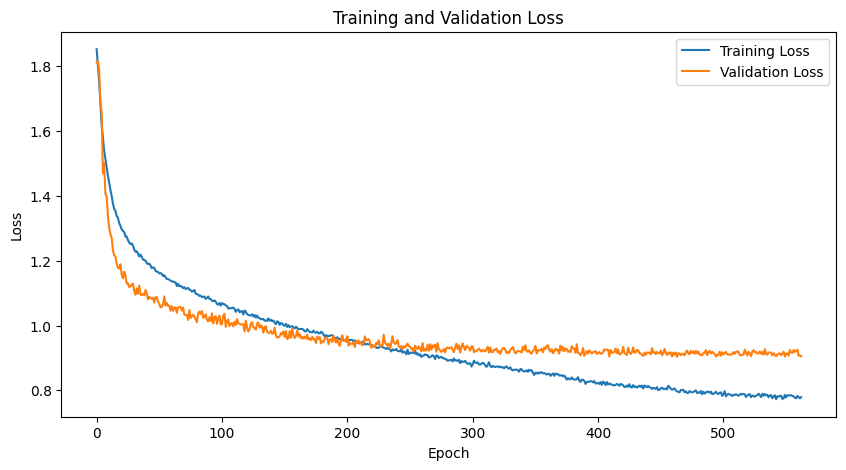

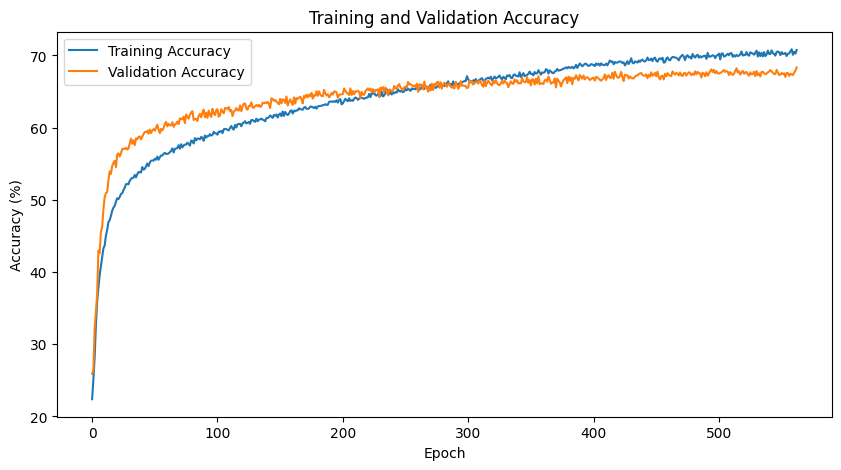

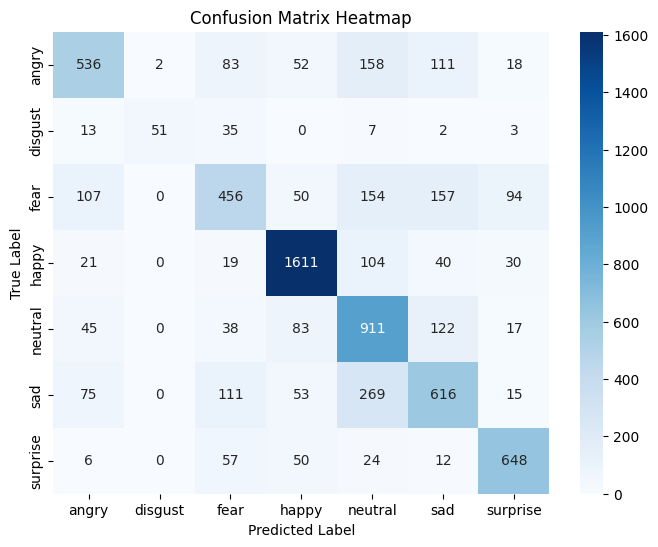

In [ ]:

# Setup
num_epochs = 1000
patience = 205
best_val_loss = float('inf')
best_val_accuracy = 0
epochs_without_improvement = 0
best_model_path = 'checkpoint.pth'

# For plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Resume training
start_epoch = 0
try:
    checkpoint = torch.load(best_model_path)
    print(f"Loading checkpoint from {best_model_path}")
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    
    best_val_loss = checkpoint['best_val_loss']
    best_val_accuracy = checkpoint['best_val_accuracy']  
    start_epoch = checkpoint['epoch'] + 1
    epochs_without_improvement = checkpoint.get('epochs_without_improvement', 0)
    
    train_losses = checkpoint['train_losses']  
    train_accuracies = checkpoint['train_accuracies'] 
    val_losses = checkpoint['val_losses'] 
    val_accuracies = checkpoint['val_accuracies'] 
    
except:
    print("No checkpoint found")



# Training Loop
for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with tqdm(train_loader, unit="batch", desc=f"Epoch {epoch+1}/{num_epochs}") as tepoch:
        for inputs, labels in tepoch:
            inputs, labels = inputs.to(device), labels.to(device)

            # Add noise
            noise = torch.randn_like(inputs).to(device)
            inputs = inputs + 0.05 * noise

            # Look how much the images are distorted
            #---------------------------------------
            
            '''
            image_display = inputs[0].cpu().numpy()
            image_display = np.transpose(image_display, (1, 2, 0))  
            
            image_display = image_display * 0.5 + 0.5
            image_display = np.clip(image_display, 0, 1)
    
            plt.figure(figsize=(6, 6))
            plt.imshow(image_display.squeeze(), cmap='gray')
            plt.axis('off')
            plt.title('Noisy Image')
            plt.show() 
            '''
            
            #---------------------------------------
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            tepoch.set_postfix(loss=loss.item(), accuracy=100 * correct_predictions / total_predictions)

    # training stats
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f"Epoch {epoch+1} | Train Loss: {epoch_loss:.4f} | Train Accuracy: {epoch_accuracy:.2f}%")

    # Validation step
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
    
    # validation stats
    val_loss /= len(val_loader)
    val_accuracy = 100 * correct_predictions / total_predictions
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_accuracy:.2f}%")

    scheduler.step(val_loss)

    # Early stopping and saving best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_without_improvement = 0

        torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'best_val_loss': best_val_loss,
        'best_val_accuracy': best_val_accuracy,  # Save best validation accuracy
        'train_losses': train_losses,            # Save training losses
        'train_accuracies': train_accuracies,    # Save training accuracies
        'val_losses': val_losses,                # Save validation losses
        'val_accuracies': val_accuracies,        # Save validation accuracies
        'epochs_without_improvement': epochs_without_improvement
    }, best_model_path)

        print(f"Accuracy improved. Saved best model to {best_model_path}")
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print("Early stopping triggered.")
        break

# Load best model and plotting data
print(f"Loading best model from {best_model_path}")
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

# Extracting data for plotting
train_losses = checkpoint['train_losses']
train_accuracies = checkpoint['train_accuracies']
val_losses = checkpoint['val_losses']
val_accuracies = checkpoint['val_accuracies']

# Final Evaluation
model.eval()
correct_predictions = 0
total_predictions = 0
total_val_loss = 0.0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_val_loss += loss.item()
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

final_val_loss = total_val_loss / len(val_loader)
final_val_accuracy = 100 * correct_predictions / total_predictions
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_predictions)
# Use the same transform you use in validation dataset
validation_data = datasets.ImageFolder(root=val, transform=val_transform)
class_names = validation_data.classes

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


Detected classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


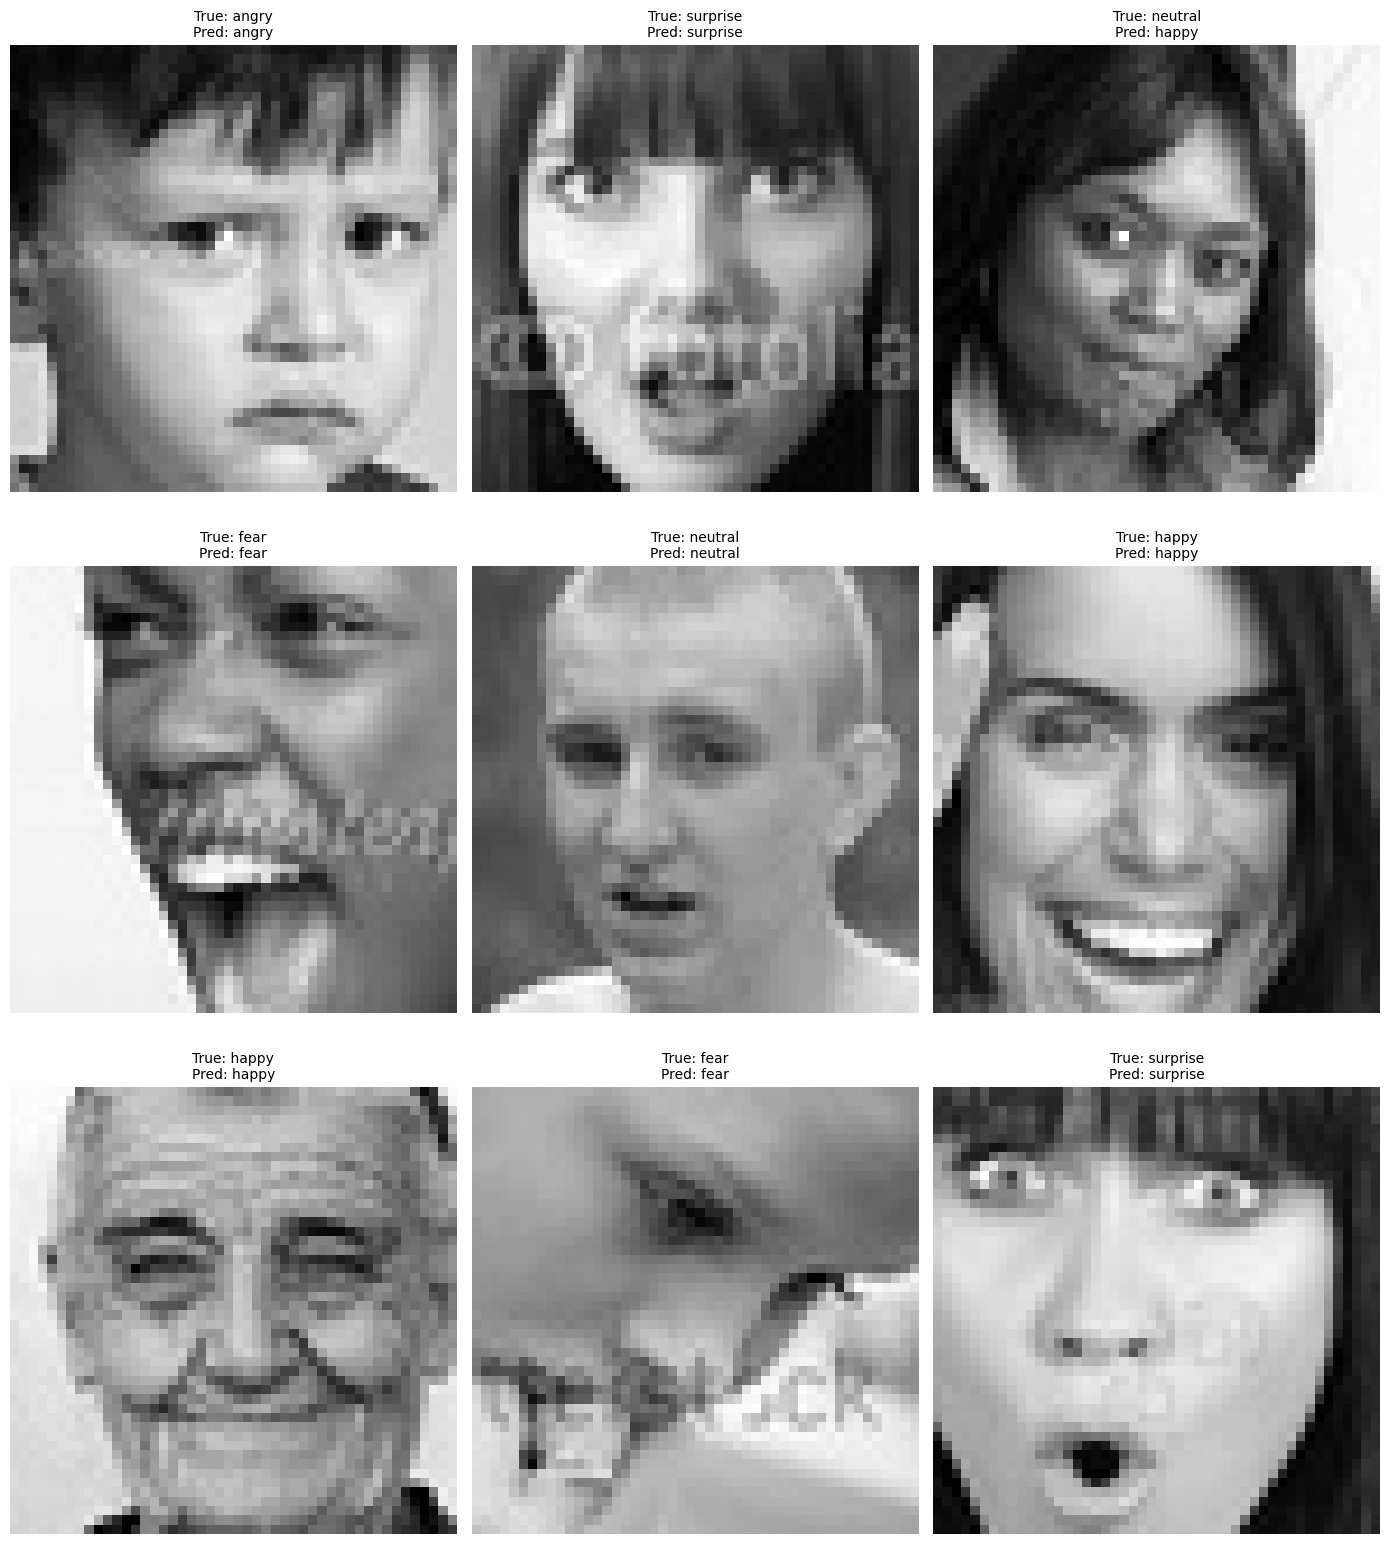

In [ ]:
# Evaluation

import torch
import random
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn 
from torchvision import datasets, transforms


# Define the model
class EmotionRecognitionModel(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionRecognitionModel, self).__init__()

        # 1st Convolutional Block 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.36)

        # 2nd Convolutional Block
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.36)

        # 3rd Convolutional Block
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.36)

        # 4th Convolutional Block
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout4 = nn.Dropout(0.36)

        # Flattening and Fully Connected Layers
        self.fc_input_size = 256 * 3 * 3

        # Fully connected layer 1st layer
        self.fc1 = nn.Linear(self.fc_input_size, 256)
        self.bn5 = nn.BatchNorm1d(256)
        self.relu5 = nn.ReLU()
        self.dropout5 = nn.Dropout(0.36)

        # Fully connected layer 2nd layer
        self.fc2 = nn.Linear(256, 512)
        self.bn6 = nn.BatchNorm1d(512)
        self.relu6 = nn.ReLU()
        self.dropout6 = nn.Dropout(0.36)

        # Output layer
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Apply convolutional blocks
        x = self.dropout1(self.pool1(self.relu1(self.bn1(self.conv1(x)))))
        x = self.dropout2(self.pool2(self.relu2(self.bn2(self.conv2(x)))))
        x = self.dropout3(self.pool3(self.relu3(self.bn3(self.conv3(x)))))
        x = self.dropout4(self.pool4(self.relu4(self.bn4(self.conv4(x)))))

        # Flatten
        x = x.view(x.size(0), -1)

        # Apply fully connected layers
        x = self.dropout5(self.relu5(self.bn5(self.fc1(x))))
        x = self.dropout6(self.relu6(self.bn6(self.fc2(x))))

        # Output layer
        x = self.fc3(x)

        return x

val = './images/validation' 
image_size = (48, 48)

val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),   
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load Data and Model
validation_data = datasets.ImageFolder(root=val, transform=val_transform)

model = EmotionRecognitionModel(num_classes=len(validation_data.classes))

checkpoint = torch.load('./checkpoint.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])


device = torch.device("cpu")
model.to(device)
model.eval()  

class_names = validation_data.classes
print(f"Detected classes: {class_names}")

num_images = 9

random_indices = random.sample(range(len(validation_data)), num_images)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 16))
axes = axes.flatten()

# Evaluate and Plot images 
for idx, img_idx in enumerate(random_indices):
    image, true_label_index = validation_data[img_idx]
    true_label = class_names[true_label_index]

    image_input = image.unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image_input)
        _, predicted_label_index = torch.max(outputs, 1)
        predicted_label = class_names[predicted_label_index.item()]

    image_display = image.cpu().numpy()
    image_display = np.transpose(image_display, (1, 2, 0))

    image_display = image_display * 0.5 + 0.5
    image_display = np.clip(image_display, 0, 1)

    axes[idx].imshow(image_display.squeeze(), cmap='gray')
    axes[idx].set_title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()